## Predicting the Relationship Between Student Knowledge Level and Study Habits of Electrical DC Machines

#### Introduction

Our project topic is about student understanding and knowledge of a subject in relationship to the students' study habits. Students often employ many different study techniques for different subjects in hopes to gain a full understanding of the topic. Study habits include the time spent studying the subject, repitition of the subject, exam performance in the subject, as well as how the study habits of related subjects impacts the students' knowledge of the goal subject. 

For our project, our question is can we predict the knowledge level of students based off of their study habits? The dataset that we will use to answer our question is a collection of data obtained from a Ph. D. thesis ("Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN"). The data includes information about students’ knowledge of Electrical DC Machines on a ranking from  very_low, low, middle, and high. The dataset also includes information about how long the students spent studying the subject, related subjects, the students’ exam performance in Electrical DC Machines, and the students' exam performance in related subjects - all were ranked on a scale of 0-1. For our project, we plan to predict the knowledge level of the users of Electrical DC Machine based on their STG (degree of study time for goal object materials), SCG (degree of repetition number of user for goal object material), STR (degree of study time of user for related objects with goal objects), LPR (exam performance of user for related objects with goal object), PEG (exam performance of user for goal objects). 

#### Preliminary Exploratory Data Analysis

In [1]:
library(tidyverse)
library(readxl)
library(tidymodels)
set.seed(7)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

#### Methods

We loaded the "User Knowledge" data frame into GitHub and then used the raw GitHub url to read our data into R. We removed the 'SCG' column which contains information about the degree of repetition number of user for goal object materials as there was not a similar column for related subjects and we believed the other predictive variables to have more of an impact on knowledge level. As well, we tidied the column names to make them more human readable, and we mutated the 'exam_performance' column to contain values as a percentage.

In [2]:
student_data <- read_csv("https://raw.githubusercontent.com/maywilsdon/dsci-100-2023s1-group-20/main/data/Data_User_Modeling_Dataset_Hamdi%20Tolga%20KAHRAMAN%20(2).csv")|>
    select(STG:UNS) |>
    select(-SCG) |>
    mutate(UNS = as.factor(UNS))
colnames(student_data) <- c("study_time","related_subject_time", "related_exam_performance",  "exam_performance","knowledge_level")

student_data <- mutate(student_data, exam_performance_percentage = exam_performance * 100)


New names:
• `` -> `...7`
• `` -> `...8`
Rows: 258 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): UNS, Attribute Information:
dbl (5): STG, SCG, STR, LPR, PEG
lgl (2): ...7, ...8

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Table 1: First 6 rows of student_data data frame

In [3]:
head(student_data)

study_time,related_subject_time,related_exam_performance,exam_performance,knowledge_level,exam_performance_percentage
<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
0.00,0.00,0.00,0.00,very_low,0
0.08,0.10,0.24,0.90,High,90
0.06,0.05,0.25,0.33,Low,33
0.10,0.15,0.65,0.30,Middle,30
0.08,0.08,0.98,0.24,Low,24
0.09,0.40,0.10,0.66,Middle,66


Table 2: Last 6 rows of student_data data frame

In [4]:
tail(student_data)

study_time,related_subject_time,related_exam_performance,exam_performance,knowledge_level,exam_performance_percentage
<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>
0.54,0.55,0.64,0.19,Low,19
0.61,0.69,0.92,0.58,High,58
0.78,0.71,0.19,0.60,Middle,60
0.54,0.71,0.29,0.77,High,77
0.50,0.81,0.61,0.26,Middle,26
0.66,0.76,0.87,0.74,High,74


#### Methods

Splitting student_data into a training and testing data set in order to build our knn classification model. We wanted 75% of the data set to be in the training set and the categorical variable is knowledge_level

In [5]:
student_split <- initial_split(student_data, prop = 0.75, strata = knowledge_level)  
student_train <- training(student_split)   
student_test <- testing(student_split)

#### Methods
Summarizing our training data into a table containing the mean values of the predictive variables (study_time, related_subject_time, related_exam_performance, exam_performance, and exam_performance_percentage) according to the student knowledge_level class

In [6]:
student_average <- student_train |>
    group_by(knowledge_level) |>
    summarize(across(study_time:exam_performance_percentage, mean)) 

Table 3: Mean Values of Variables According to Knowledge Level

In [7]:
student_average

knowledge_level,study_time,related_subject_time,related_exam_performance,exam_performance,exam_performance_percentage
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
High,0.4130426,0.5195745,0.5008511,0.77446809,77.446809
Low,0.3255167,0.4488333,0.5246667,0.23588333,23.588333
Middle,0.4033846,0.5207692,0.3475385,0.53676923,53.676923
very_low,0.3156667,0.3566667,0.3600000,0.09095238,9.095238


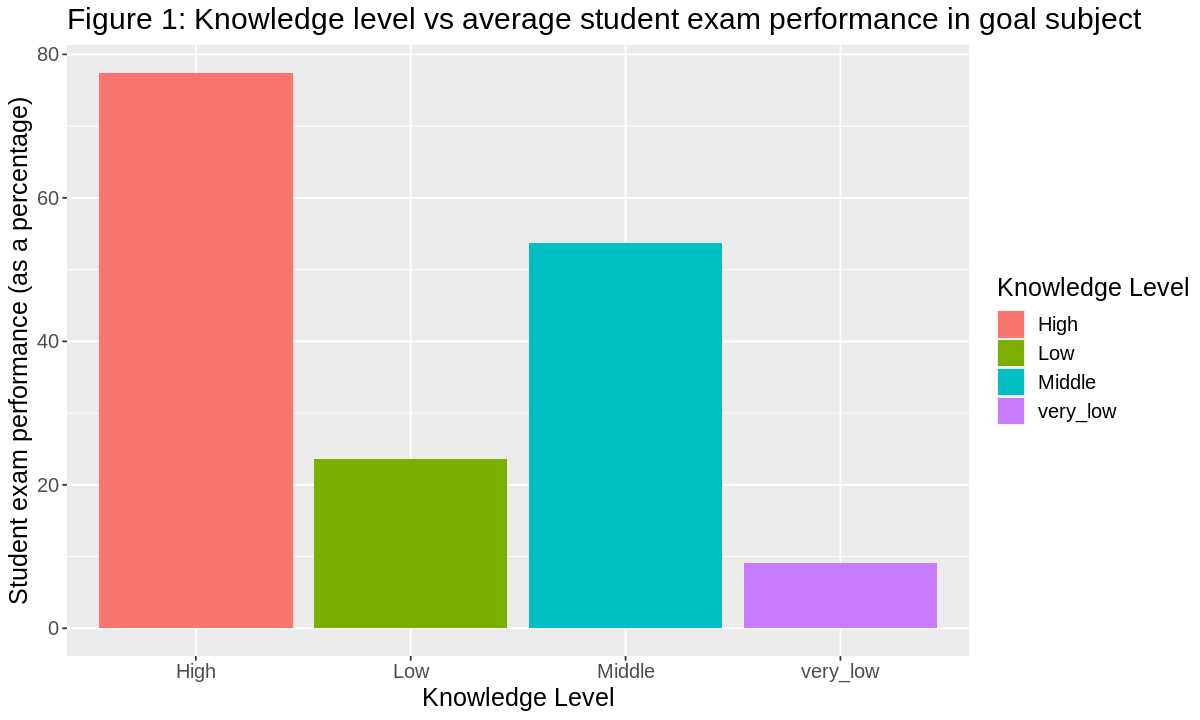

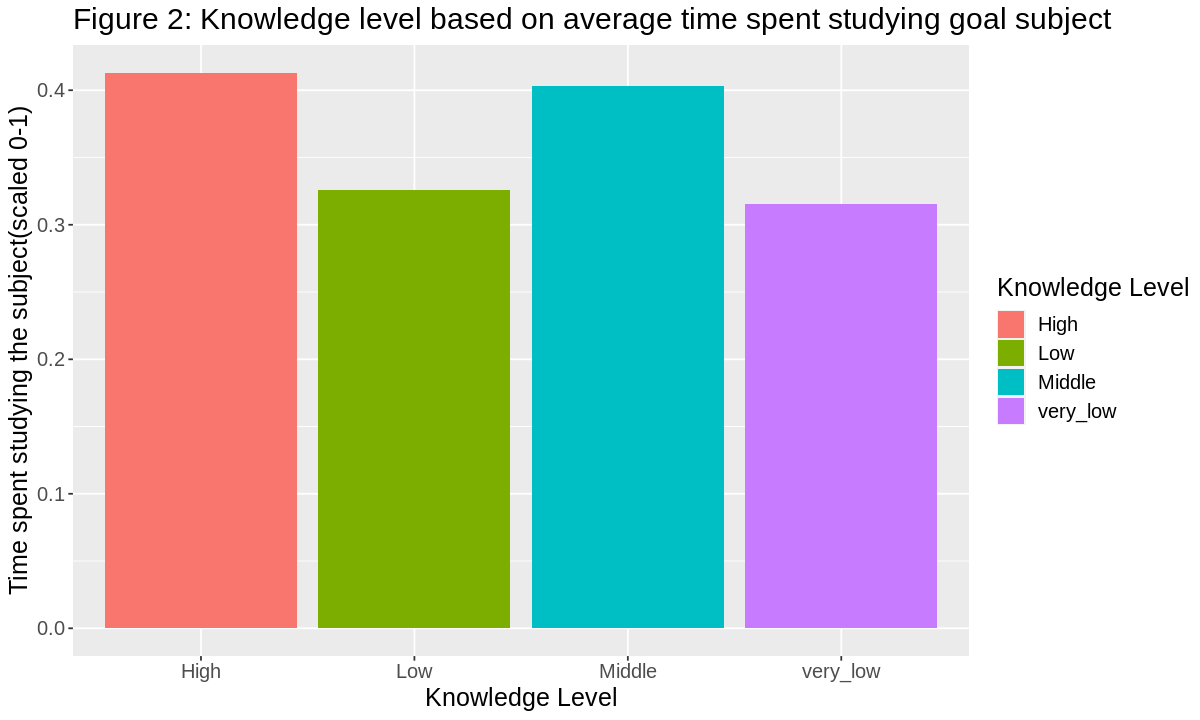

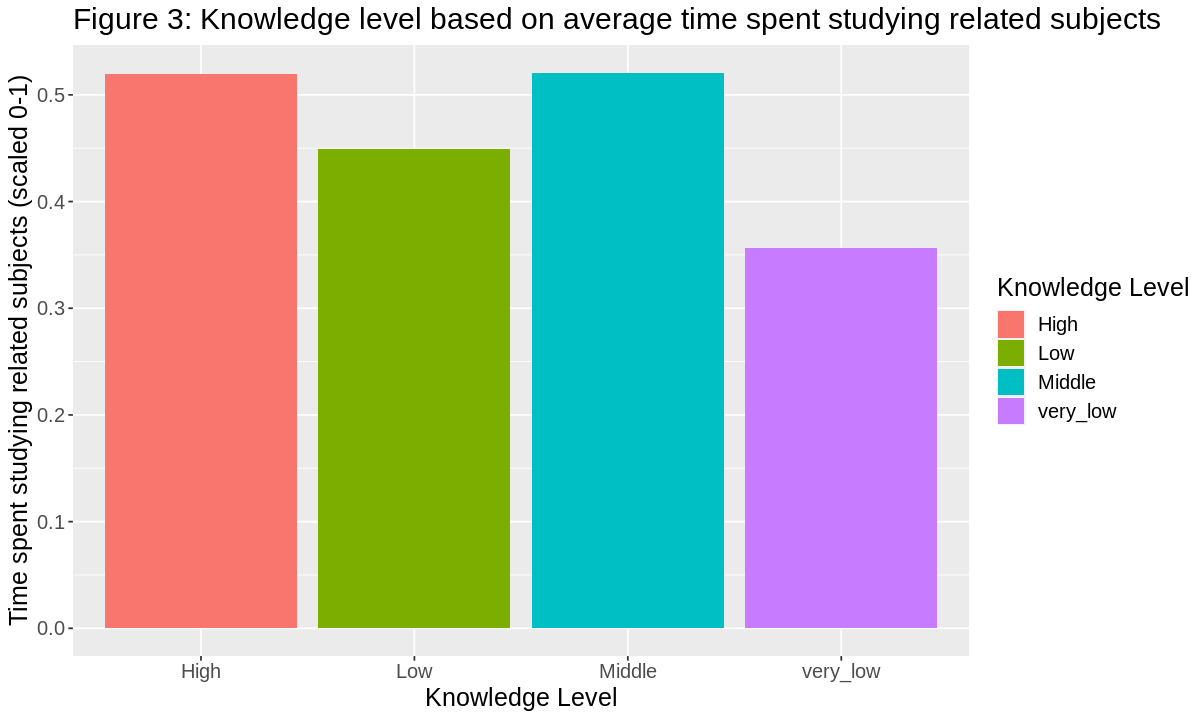

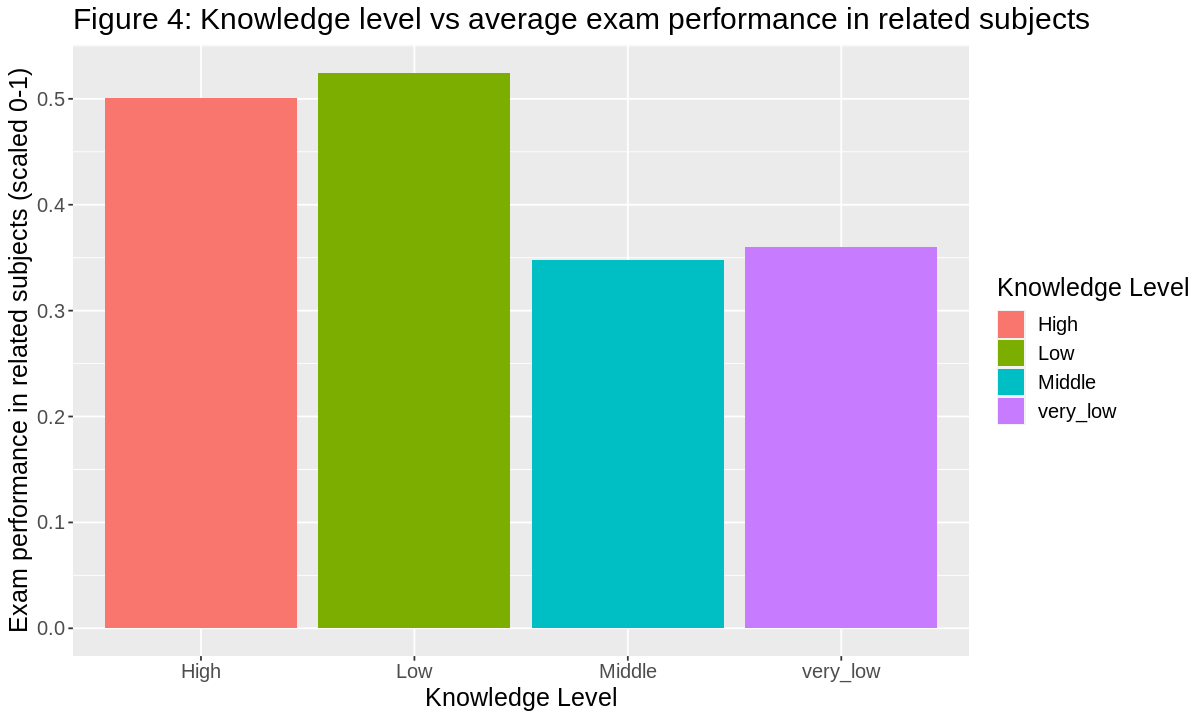

In [8]:
# Visualizing our training data into a scatter plot of student exam performance (%) vs the time the student spent
# studying the subject. The plot is coloured according to the student's knowledge level of Electrical DC Machines

options(repr.plot.width=10, repr.plot.height=6)

plot_exam_perf <- student_average |>
    ggplot(aes(x = knowledge_level, y = exam_performance_percentage, fill = knowledge_level)) +
    geom_bar(stat = "identity") +
    labs(x = "Knowledge Level",
         y = "Student exam performance (as a percentage)",
        fill = "Knowledge Level") +
    ggtitle("Figure 1: Knowledge level vs average student exam performance in goal subject") +
     theme(text = element_text(size = 15))
plot_exam_perf

plot_study_time <- student_average |>
    ggplot(aes(x = knowledge_level, y = study_time, fill = knowledge_level)) +
    geom_bar(stat = "identity") +
    labs(x = "Knowledge Level",
         y = "Time spent studying the subject(scaled 0-1)",
        fill = "Knowledge Level") +
    ggtitle("Figure 2: Knowledge level based on average time spent studying goal subject") +
    theme(text = element_text(size = 15))
plot_study_time

plot_rel_subject_time <- student_average |>
    ggplot(aes(x = knowledge_level, y = related_subject_time, fill = knowledge_level)) +
    geom_bar(stat = "identity") +
    labs(x = "Knowledge Level",
         y = "Time spent studying related subjects (scaled 0-1)",
        fill = "Knowledge Level") +
    ggtitle("Figure 3: Knowledge level based on average time spent studying related subjects") +
    theme(text = element_text(size = 15))
plot_rel_subject_time

plot_rel_exam_perf <- student_average |>
    ggplot(aes(x = knowledge_level, y = related_exam_performance, fill = knowledge_level)) +
    geom_bar(stat = "identity") +
    labs(x = "Knowledge Level",
         y = "Exam performance in related subjects (scaled 0-1)",
        fill = "Knowledge Level") +
    ggtitle("Figure 4: Knowledge level vs average exam performance in related subjects") +
    theme(text = element_text(size = 15))
plot_rel_exam_perf


#### Methods

After looking at Table 3 and Figures 1-4 above, we decided to use study_time and exam_performance_percentage as our predictive variables in order to classify the new observations' knowledge_level. Using Table 3, we compared the mean values of our predictor variables at each knowledge level and identified differences in the data, which suggested that there was a significance to the groupings. In the exam performance and time spent studying columns the high and very_low knowledge levels had large discrepancies which suggests that these predictors have a significant impact in knowledge level. 

Whereas, in the related subject time column the mean for middle knowledge level is greater than the mean for the high knowledge level. Similarly, in the related exam performance column the mean for low knowledge level exam performance is greater than the mean for high knowledge level exam performance. Thus, the 2 columns regarding related subjects seem to have less of an impact on student knowledge level in our goal subject. 

Based on our Figures above... 

Thus, we tidied our summary table to only include the mean for the predictive variables we are interested in.

In [9]:
summarize_average <- student_average |>
    select(knowledge_level, study_time, exam_performance_percentage)

Table 4: Mean Values of our Predictive Variables According to Knowledge Level

In [10]:
summarize_average

knowledge_level,study_time,exam_performance_percentage
<fct>,<dbl>,<dbl>
High,0.4130426,77.446809
Low,0.3255167,23.588333
Middle,0.4033846,53.676923
very_low,0.3156667,9.095238


#### Methods

Preprocessing our training data by creating a recipe, scaling our predictors, and creating our model specification.

In [11]:
set.seed(7)

# Creating our recipe, model specification, and performing 5-fold cross-valdiation to choose the best K value for our model

student_recipe <- recipe(knowledge_level ~ study_time + exam_performance_percentage, data = student_train) |>
    step_center(all_predictors()) |>
    step_scale(all_predictors())

student_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")


#### Methods

In order to choose the best K for our classification model, we then tuned our model and performed a 5-fold cross-validiation using K = 1-10. Then, we evaluated the accuracy of the different K's by plotting accuracy estimate vs the number of neighbors.

In [12]:
set.seed(7)

gridvals <- tibble(neighbors = seq(from = 1, to = 10, by = 1))

student_vfold <- vfold_cv(student_train, v = 5, strata = knowledge_level)

student_results <- workflow() |>
    add_recipe(student_recipe) |>
    add_model(student_tune) |>
    tune_grid(resamples = student_vfold, grid = gridvals) |>
    collect_metrics()

Table 5: Evaluating the Accuracy of K

In [13]:
accuracies <- student_results |> 
       filter(.metric == "accuracy")
accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.6992510,5,0.008033632,Preprocessor1_Model01
2,accuracy,multiclass,0.6992510,5,0.008033632,Preprocessor1_Model02
3,accuracy,multiclass,0.7779150,5,0.031467421,Preprocessor1_Model03
4,accuracy,multiclass,0.7831781,5,0.033430063,Preprocessor1_Model04
5,accuracy,multiclass,0.7829217,5,0.029265380,Preprocessor1_Model05
6,accuracy,multiclass,0.7776586,5,0.025674211,Preprocessor1_Model06
7,accuracy,multiclass,0.7723954,5,0.022743556,Preprocessor1_Model07
8,accuracy,multiclass,0.7723954,5,0.022743556,Preprocessor1_Model08
9,accuracy,multiclass,0.7723954,5,0.017592985,Preprocessor1_Model09


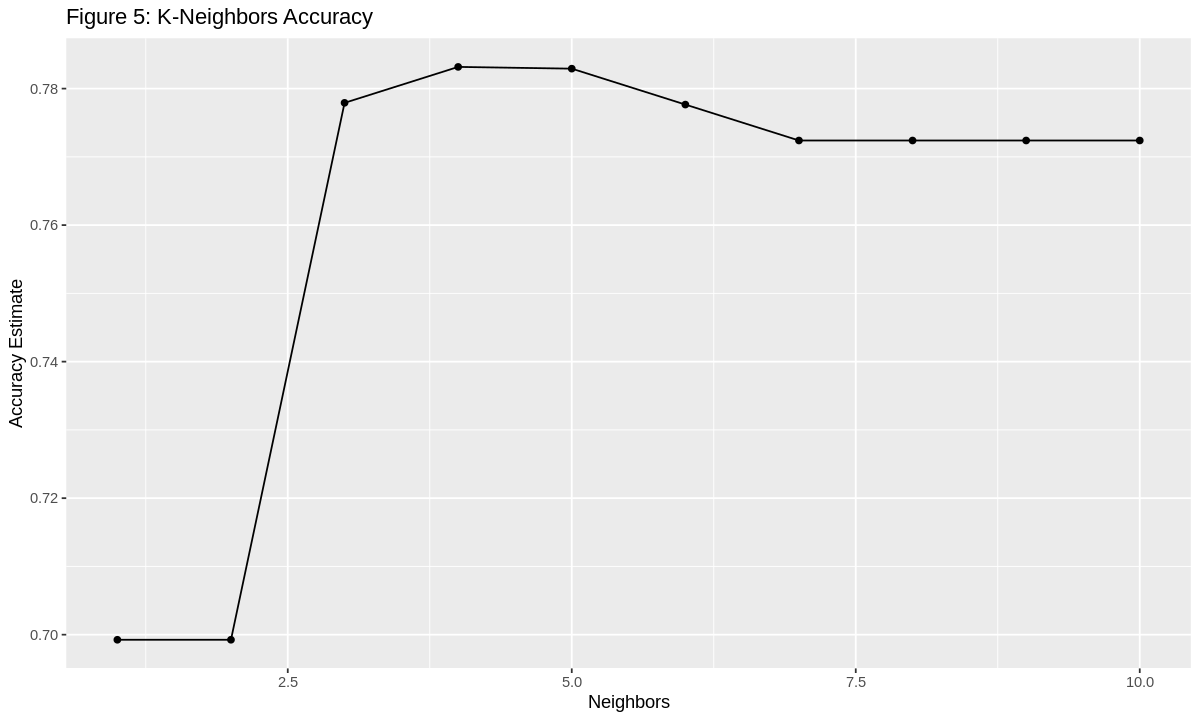

In [14]:
accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
       geom_point() +
       geom_line() +
       labs(x = "Neighbors", y = "Accuracy Estimate") +
    ggtitle("Figure 5: K-Neighbors Accuracy")
accuracy_versus_k

#### Methods

Based on Table 5 and Figure 5, we found that when K = 4 neighbors, the accuracy estimate is the highest (0.7831781). Thus, for our model we selected K = 4.

We then performed our classification analysis on our testing data set (student_test) using K = 4 neighbors.  

In [15]:
set.seed(7)

student_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 4) |>
    set_engine("kknn") |>
    set_mode("classification")

student_fit <- workflow() |>
    add_recipe(student_recipe) |>
    add_model(student_spec) |>
    fit(student_train)

student_predictions <- predict(student_fit, student_test) |>
    bind_cols(student_test) |>
    select(-related_subject_time, -related_exam_performance, -exam_performance) 


Table 6: First 6 rows of predicted data

In [16]:
head(student_predictions)

.pred_class,study_time,knowledge_level,exam_performance_percentage
<fct>,<dbl>,<fct>,<dbl>
High,0.08,High,90
Low,0.06,Low,33
Low,0.05,very_low,5
Middle,0.10,Low,33
Low,0.15,Low,29
Middle,0.20,Middle,56


Table 7: Last 6 rows of predicted data

In [17]:
tail(student_predictions)

.pred_class,study_time,knowledge_level,exam_performance_percentage
<fct>,<dbl>,<fct>,<dbl>
Middle,0.52,Middle,52
Middle,0.64,Middle,63
High,0.91,High,88
Middle,0.72,Middle,45
High,0.56,Middle,50
High,0.54,High,77


#### Methods

We then computed the mean study time and mean exam performance for the predicted knowledge level class that was determined by our model on our testing data set. Table 8 shows that the highest mean study time and exam performance was categorized as high knowledge level, and similarly the lowest mean study time and exam performance was categorized as very low knowledge level.

Table 8: Mean predictive variables according to predicted knowledge level

In [18]:
student_predictions_average <- student_predictions |>
    group_by(.pred_class) |>
    summarize(avg_study_time = mean(study_time),
             avg_exam_performance = mean(exam_performance_percentage))
student_predictions_average

.pred_class,avg_study_time,avg_exam_performance
<fct>,<dbl>,<dbl>
High,0.4647143,78.07143
Low,0.3337083,24.29167
Middle,0.3651250,58.00000
very_low,0.2283333,9.00000


#### Methods

Observing the metrics of our model including the accuracy of our model and the confusion matrix to see how many observations our model predicted correctly and incorrectly.

Table 9: Accuracy and Confusion Matrix of Classification Model

In [19]:
student_accrucy <- student_predictions|>
    metrics(truth = knowledge_level, estimate = .pred_class) |>
    filter(.metric == "accuracy")
student_accrucy

student_conf <- student_predictions |>
     conf_mat(truth = knowledge_level, estimate = .pred_class)
student_conf

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.8307692


          Truth
Prediction High Low Middle very_low
  High       13   0      1        0
  Low         0  20      2        2
  Middle      3   1     20        0
  very_low    0   2      0        1

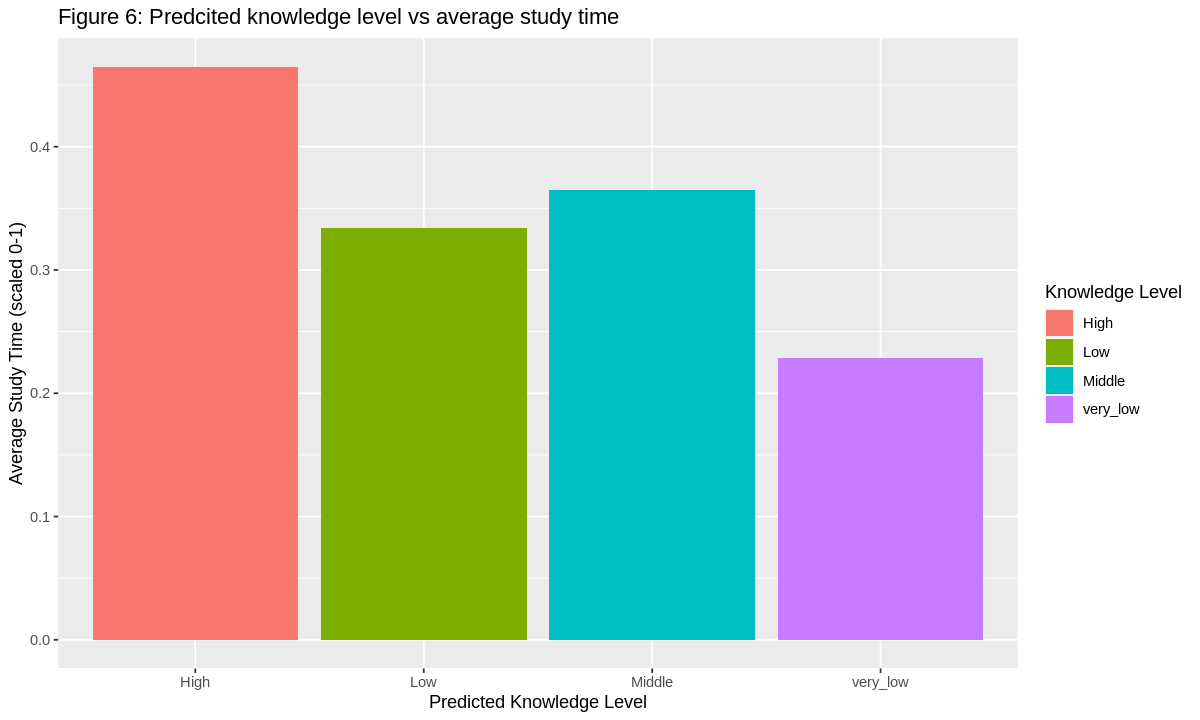

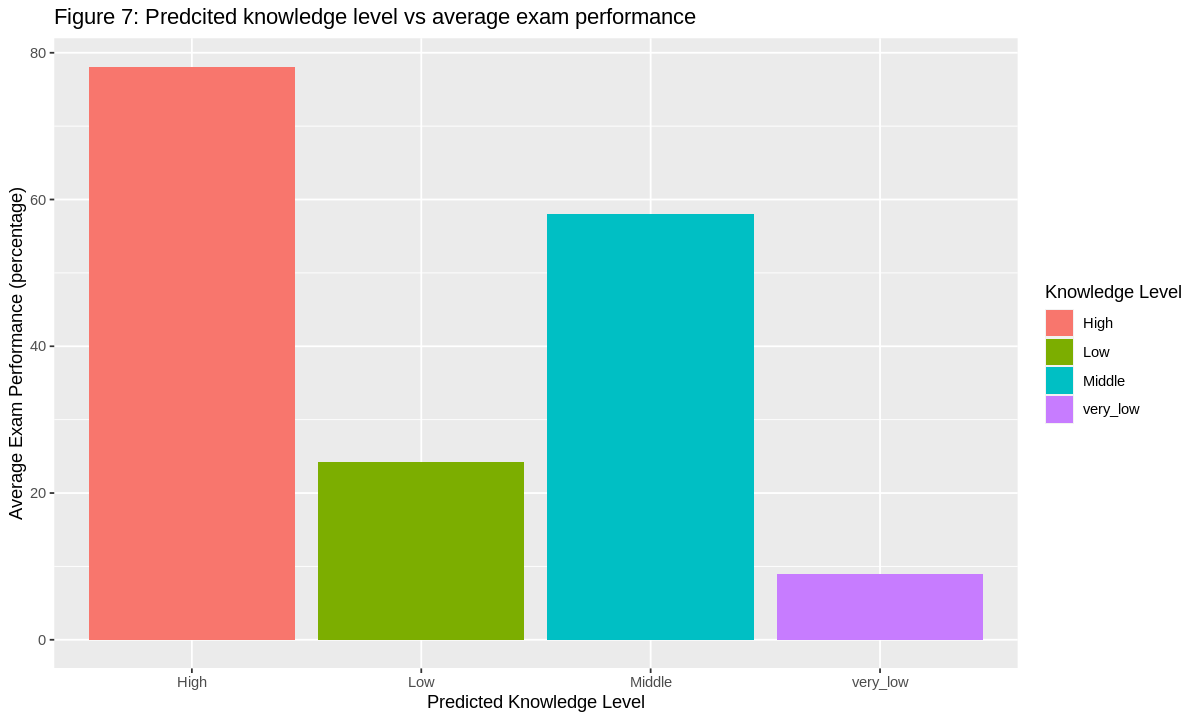

In [20]:
predicted_study_time <- student_predictions_average|>
    ggplot(aes(x = .pred_class, y = avg_study_time, fill = .pred_class)) +
    geom_bar(stat = "identity") +
    labs(x = "Predicted Knowledge Level",y = "Average Study Time (scaled 0-1)", fill = "Knowledge Level") +
    ggtitle("Figure 6: Predcited knowledge level vs average study time")
predicted_study_time

predicted_exam_performance <- student_predictions_average|>
    ggplot(aes(x = .pred_class, y = avg_exam_performance, fill = .pred_class)) +
    geom_bar(stat = "identity") +
    labs(x = "Predicted Knowledge Level",y = "Average Exam Performance (percentage)", fill = "Knowledge Level") +
    ggtitle("Figure 7: Predcited knowledge level vs average exam performance")
predicted_exam_performance

#### Expected Outcomes and Significance

We expect to find students’ knowledge of Electrical DC Machines can be predicted based on their study time for goal object materials (STG), repetition number for goal object material (SCG), study time for related objects with goal objects (STR), exam performance for related objects with goal object (LPR), and exam performance for goal objects (PEG). Specifically, higher values of STG, SCG, STR, LPR and PEG are associated with high level students’ knowledge of Electrical DC Machines.  

These findings help us to know factors that influence the students’ knowledge levels in the context of Electrical DC Machines and help students make effective learning strategies. 

Furthermore, we can also find if there are some other factors that positively influence the level of students’ knowledge, as well as some study habits/factors that negatively influence the level of the students' knowledge.

#### Discussion

##### Our Findings


##### What we Expected



##### Impact of Findings


##### Future Questions




#### References

Kahraman, Hamdi, Colak, Ilhami, and Sagiroglu, Seref. (2013). User Knowledge Modeling. UCI Machine Learning Repository. https://doi.org/10.24432/C5231X.

Jafari H, Aghaei A, Khatony A. Relationship between study habits and academic achievement in students of medical sciences in Kermanshah-Iran. Adv Med Educ Pract. 2019 Aug 15; 10:637-643. doi: 10.2147/AMEP.S208874.
